In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.corrwith(df['price'])

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
dtype: float64

## Train Test Splitting

In [5]:
x = df.drop(columns=['price'])
y = df['price']

In [6]:
x_sorted = x.drop(columns=['doornumber','car_ID','symboling','compressionratio','CarName','fuelsystem','cylindernumber','enginetype','enginelocation','carbody'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_sorted,y, test_size=0.2, random_state=42)

In [8]:
x_train

,fueltype,aspiration,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
66,diesel,std,rwd,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,72,4200,31,39
111,gas,std,rwd,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,95,5000,19,24
153,gas,std,fwd,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,62,4800,31,37
96,gas,std,fwd,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,69,5200,31,37
38,gas,std,fwd,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,gas,std,rwd,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,160,5200,19,25
14,gas,std,rwd,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,121,4250,20,25
92,gas,std,fwd,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,69,5200,31,37
179,gas,std,rwd,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,161,5200,19,24


In [9]:
x_test.head()

,fueltype,aspiration,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
15,gas,std,rwd,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,182,5400,16,22
9,gas,turbo,4wd,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,160,5500,16,22
100,gas,std,fwd,97.2,173.4,65.2,54.7,2302,120,3.33,3.47,97,5200,27,34
132,gas,std,fwd,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,110,5250,21,28
68,diesel,turbo,rwd,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,123,4350,22,25


In [10]:
x_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.728659,174.127439,65.922561,53.715854,2556.439024,126.414634,3.320854,3.254909,104.701220,5144.207317,25.073171,30.573171
std,5.968884,12.080544,2.123469,2.479386,511.935461,40.469014,0.269766,0.317892,40.228058,493.839328,6.164972,6.435199
min,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,52.000000,4150.000000,13.000000,16.000000
25%,94.500000,166.675000,64.175000,51.900000,2163.000000,98.000000,3.150000,3.110000,71.500000,4800.000000,19.000000,25.000000
50%,96.750000,173.100000,65.500000,54.100000,2422.500000,119.500000,3.310000,3.280000,95.000000,5200.000000,24.000000,30.000000
75%,102.100000,183.200000,66.675000,55.525000,2939.250000,141.000000,3.540000,3.410000,116.000000,5500.000000,30.000000,34.000000
max,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,288.000000,6600.000000,45.000000,50.000000


In [11]:
x_train.corrwith(y_train)

wheelbase     0.506118
carlength     0.652071
carwidth      0.744310
carheight     0.044458
curbweight    0.824212
enginesize    0.866433
boreratio     0.546099
stroke        0.023941
horsepower    0.810986
peakrpm      -0.070017
citympg      -0.711245
highwaympg   -0.713503
dtype: float64

In [12]:
def correlation(dataset, thresold):
    corr_features = set()
    corr_mat = dataset.corr()
    for i in range (len(corr_mat.columns)):
        for j in range (i):
            if abs(corr_mat.iloc[i,j]) > thresold:
                col_names = corr_mat.columns[i]
                corr_features.add(col_names)
    return corr_features

In [13]:
correlation(x_train,0.7)

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

C:\Users\Anind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginesize'>

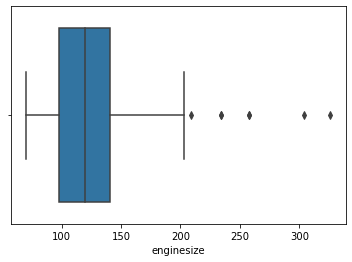

In [14]:
sns.boxplot(x_train['enginesize'])

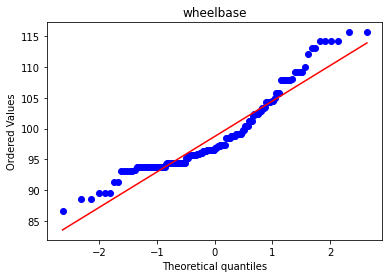

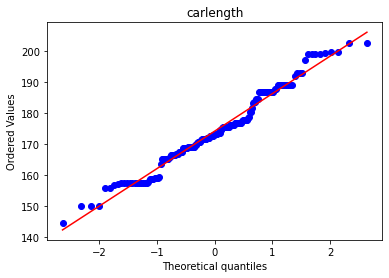

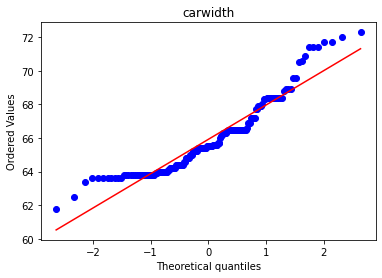

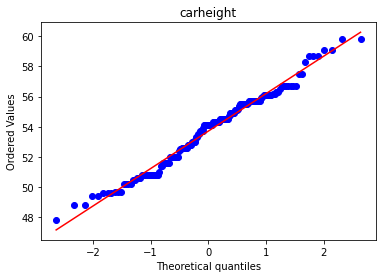

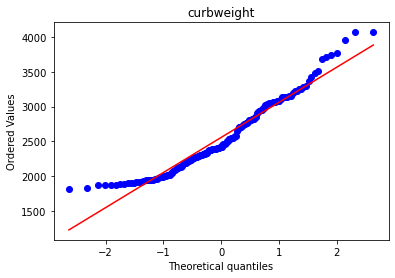

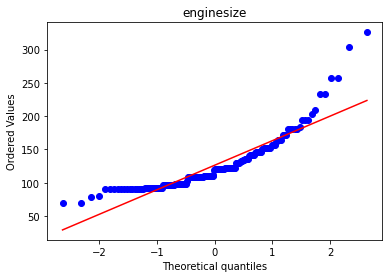

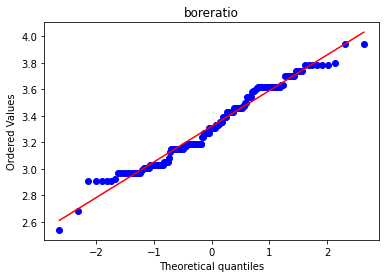

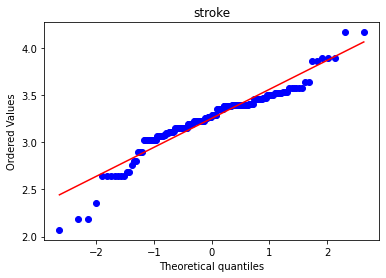

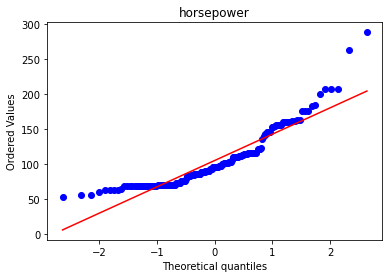

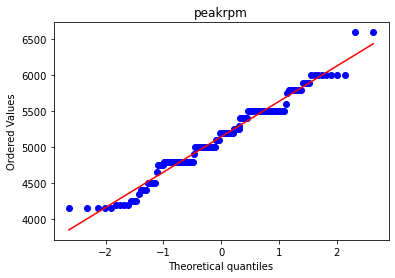

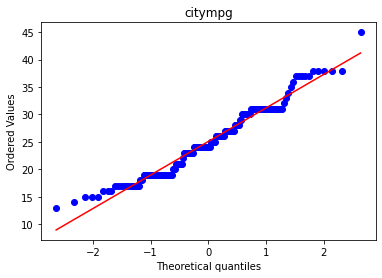

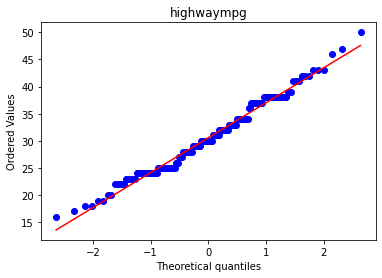

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = x_train.select_dtypes(include=numerics)
for cols in newdf.columns:
    stats.probplot(newdf[cols], dist='norm', plot=plt)
    plt.title(cols)
    plt.show()

In [16]:
new_xtrain_df = x_train.select_dtypes(include=numerics)
new_xtest_df = x_test.select_dtypes(include=numerics)

In [17]:
def removeOutliers(df):    
    for col in df.columns:
        if df[col].dtype != 'O':
            Q3 = df[col].quantile(0.75)
            Q1 = df[col].quantile(0.25)
            iqr = Q3 - Q1
            upper_limit = Q3 + 1.5*iqr
            lower_limit = Q1 - 1.5*iqr
            df[col] = np.where(df[col] > upper_limit,upper_limit,np.where(df[col] < lower_limit,lower_limit,df[col]))
    return df

In [18]:
new_x_train = removeOutliers(x_train)
# new_x_test = removeOutliers(x_test)

In [19]:
new_x_train.head()

,fueltype,aspiration,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
66,diesel,std,rwd,104.9,175.0,66.1,54.4,2700.0,134.0,3.43,3.64,72.0,4200.0,31.0,39.0
111,gas,std,rwd,107.9,186.7,68.4,56.7,3075.0,120.0,3.46,2.66,95.0,5000.0,19.0,24.0
153,gas,std,fwd,95.7,169.7,63.6,59.1,2280.0,92.0,3.05,3.03,62.0,4800.0,31.0,37.0
96,gas,std,fwd,94.5,165.3,63.8,54.5,1971.0,97.0,3.15,3.29,69.0,5200.0,31.0,37.0
38,gas,std,fwd,96.5,167.5,65.2,53.3,2289.0,110.0,3.15,3.58,86.0,5800.0,27.0,33.0


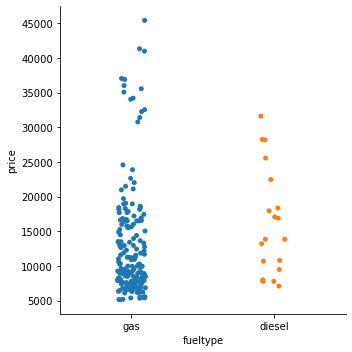

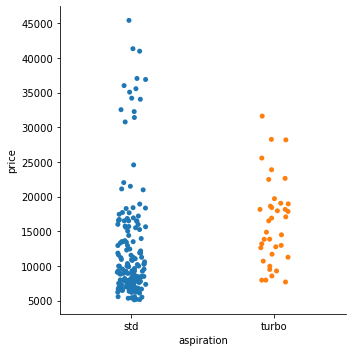

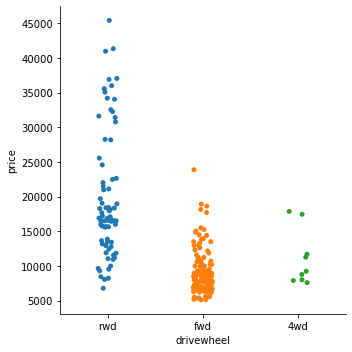

In [20]:
for cols in x_train.columns:
    if x_train[cols].dtype == 'O':
        sns.catplot(x= cols, y= 'price', data= df)

In [21]:
x_train.shape

(164, 15)

In [22]:
x_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.685976,174.127439,65.863720,53.715854,2556.439024,124.070122,3.321006,3.262409,103.019817,5143.597561,25.073171,30.557927
std,5.855844,12.080544,1.974003,2.479386,511.935461,32.659420,0.269328,0.272948,35.103124,492.058263,6.164972,6.391712
min,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.565000,2.660000,52.000000,4150.000000,13.000000,16.000000
25%,94.500000,166.675000,64.175000,51.900000,2163.000000,98.000000,3.150000,3.110000,71.500000,4800.000000,19.000000,25.000000
50%,96.750000,173.100000,65.500000,54.100000,2422.500000,119.500000,3.310000,3.280000,95.000000,5200.000000,24.000000,30.000000
75%,102.100000,183.200000,66.675000,55.525000,2939.250000,141.000000,3.540000,3.410000,116.000000,5500.000000,30.000000,34.000000
max,113.500000,202.600000,70.425000,59.800000,4066.000000,205.500000,3.940000,3.860000,182.750000,6550.000000,45.000000,47.500000


In [23]:
transformer = ColumnTransformer(transformers=[('scaler', StandardScaler(), ['curbweight','peakrpm','carlength','enginesize','horsepower']),
                                ('OHE',OneHotEncoder(drop='first', sparse=False),['aspiration','fueltype','drivewheel']),
                                ('Pt',PowerTransformer(),['wheelbase'])], remainder='passthrough')

In [24]:
x_train_transformed = transformer.fit_transform(new_x_train)
x_test_transformed = transformer.fit_transform(x_test)

C:\Users\Anind\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [25]:
x_train_transformed.shape

(164, 16)

In [26]:
x_test_transformed.shape

(41, 16)

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train_transformed,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test_transformed)

In [30]:
r2 = r2_score(y_test,y_pred)
r2

0.8200990066292135

In [31]:
x_transformed = transformer.fit_transform(x_sorted)

In [32]:
x_transformed.shape

(205, 16)

In [33]:
y_test.shape

(41,)

In [34]:
y_train.shape

(164,)

In [35]:
x_train_transformed.shape

(164, 16)

In [36]:
y_pred.shape

(41,)

In [37]:
x_train_transformed.shape

(164, 16)

In [38]:
np.mean(cross_val_score(model,x_transformed,y, cv=10, scoring='r2'))

0.20676825926308742

In [39]:
R2 = 1-(1-r2)*(164-1)/(164-15-1)
R2

0.8018657978416338